<a href="https://www.kaggle.com/code/rubanzasilva/eda-fast-ai-neural-nets-gradient-boosting?scriptVersionId=254886785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Binary Classification on a Bank Dataset 

In this competition, we are tasked with predicting whether a client will subscribe to a term deposit.

Per Investopedia, a [bank term deposit](https://www.investopedia.com/terms/t/termdeposit.asp) is a bank savings product where funds are committed to a financial institution for a certain duration. Here, you agree to deposit a specific amount of money for a predetermined period of time in exchange for a guaranteed interest rate.

This interest rate is usually higher than that given on a regular savings account because you are giving up liquidity. The trade-off is simple: you sacrifice immediate access to your money in exchange for higher, guaranteed returns. Banks can offer better rates because they know exactly how long they'll have your funds to lend out to other customers.

## Library & Data Import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
%%time
%pip install catboost
%pip install optuna
#%pip install optuna_distributed
#%pip install openfe
%pip install seaborn
%pip install xgboost
%pip install lightgbm
%pip install fastkaggle
#%pip install h2o
%pip install -Uqq fastbook
#%pip install polars
%pip install -q -U autogluon.tabular
%pip install autogluon
%pip install --upgrade pip
%pip install tqdm
#%pip install wandb
#%pip install sweetviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The latest version of AutoGluon appears to have a compatibility issue with the latest versions of NumPy, so for now, I will downgrade NumPy to a known working version.

In [3]:
#%pip install -U autogluon > /dev/null
# In your terminal/command prompt
#pip install numpy==1.24.3
# or
%pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 145.0 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
autogluon-core 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-tabular 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-multimodal 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-common 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is incompatible.
autogluon-features 1.4.0 requires numpy<2.4.0,>=1.25.0, but you have numpy 1.23.5 which is

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm

#import fastbook
#fastbook.setup_book()
#from fastbook import *
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
from tqdm import tqdm
from ipywidgets import interact

from fastai.imports import *
np.set_printoptions(linewidth=130)


from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score,train_test_split,GridSearchCV


from pathlib import Path
import os

import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier,CatBoostRegressor,Pool, metrics, cv


import warnings


#from openfe import OpenFE, transform
from autogluon.tabular import TabularDataset, TabularPredictor

#import h2o
#from h2o.automl import H2OAutoML

import gc

import optuna
from optuna.samplers import TPESampler

import pickle
from joblib import dump, load
#import sweetviz as sv
#from IPython.display import FileLink

#import h2o
#from h2o.automl import H2OAutoML

In [5]:
path = Path('/kaggle/input/playground-series-s5e8/')
path

Path('/kaggle/input/playground-series-s5e8')

In [6]:
train_df = pd.read_csv(path/'train.csv',index_col='id')
test_df = pd.read_csv(path/'test.csv',index_col='id')
sub_df = pd.read_csv(path/'sample_submission.csv')

In [7]:
train_df.shape

(750000, 17)

## Exploratory Data Analysis

In [8]:
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
id,,,,,,,,,,,,,,,,,
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 103.0+ MB


In [10]:
train_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
missing_values_count = train_df.isnull().sum()
sorted_missing_values = missing_values_count.sort_values(ascending=False)
print(sorted_missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [12]:
#Missing values returned as percentages.
missing_percentages = train_df.isnull().mean() * 100
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
print(sorted_missing_percentages)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64


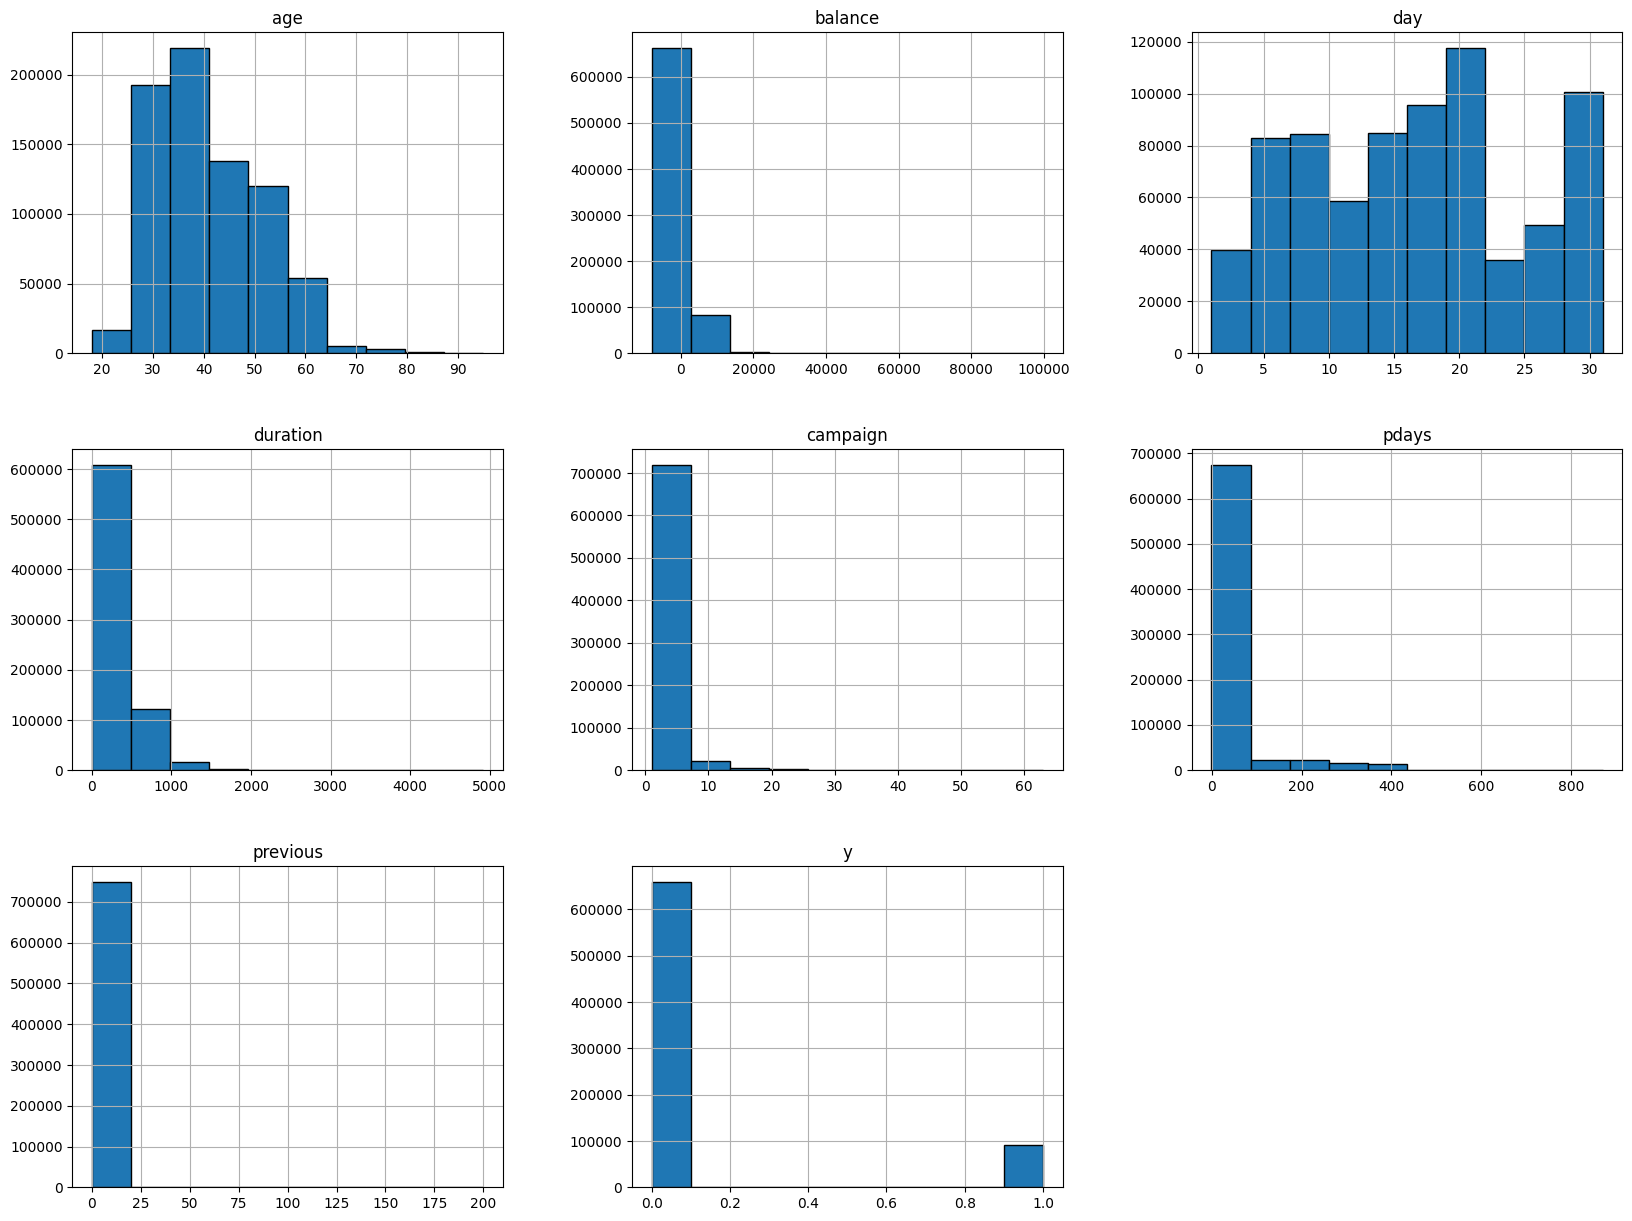

In [13]:
train_df.hist(figsize=(20,15),edgecolor='black');

In [14]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,750000.0,40.926395,10.098829,18.0,33.0,39.0,48.0,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.0,634.0,1390.0,99717.0
day,750000.0,16.117209,8.250832,1.0,9.0,17.0,21.0,31.0
duration,750000.0,256.229144,272.555662,1.0,91.0,133.0,361.0,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.0,2.0,3.0,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.0,-1.0,-1.0,871.0
previous,750000.0,0.298545,1.335926,0.0,0.0,0.0,0.0,200.0
y,750000.0,0.120651,0.325721,0.0,0.0,0.0,0.0,1.0


## Prepare Data for training

In [15]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [16]:
#train_df = pd.concat([train_df, original_df], ignore_index=True)

In [17]:
cont_names,cat_names = cont_cat_split(train_df, dep_var='y')
#splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
#to = TabularPandas(train_df, procs=[Categorify,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='y',
                   y_block=CategoryBlock(),
                   splits=splits)
dls = to.dataloaders(bs=64)
#dls = to.dataloaders(bs=1024)
test_dl = dls.test_dl(test_df)

X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

In [18]:
cont_names,len(cont_names)

(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], 7)

In [19]:
cat_names, len(cat_names)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome'],
 9)

In [20]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
id,,,,,,,,,,,,,,,,
222078,10,3,3,1,2,1,1,6,4,-0.587170,0.112978,1.077058,-0.620676,0.893928,-0.303472,-0.222649
331639,5,2,3,1,1,1,1,7,4,-0.289965,0.110160,-1.589049,3.109288,-0.211986,-0.303472,-0.222649
737009,10,3,2,1,2,1,3,9,4,0.403513,-0.231515,1.198245,-0.260896,-0.211986,-0.303472,-0.222649
459662,5,2,4,1,1,1,1,2,4,1.592333,-0.020170,-0.377182,1.119484,0.893928,-0.303472,-0.222649
115390,4,2,1,1,1,2,3,7,4,0.106308,-0.114923,-0.013622,-0.525224,-0.580624,-0.303472,-0.222649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108913,2,2,2,1,2,1,1,9,4,-0.389033,-0.229402,-1.225489,-0.312293,-0.580624,-0.303472,-0.222649
370555,1,1,2,1,2,1,3,7,4,-0.389033,-0.677454,-1.467863,-0.903360,2.368481,-0.303472,-0.222649
112761,11,3,3,1,1,1,2,4,4,0.007240,0.959416,-0.861929,-0.782210,0.156652,-0.303472,-0.222649


Below we define a function to help us do stratified kfold cross validation which we use below

In [21]:
def cross_val_predict(model, X_train, y_train, X_test, n_splits=5, random_state=42, 
                       return_proba=True, scoring='roc_auc', verbose=True):
    """
    Generic cross-validation function that works with ANY sklearn-compatible model.
    
    Parameters:
    - model: INSTANTIATED model object (e.g., xgb.XGBClassifier(n_estimators=100))
    - X_train, y_train: training data and labels
    - X_test: test data for final predictions
    - n_splits: number of CV folds
    - random_state: random seed for reproducibility
    - return_proba: if True, return probabilities; if False, return class predictions
    - scoring: metric to use ('roc_auc', 'accuracy')
    - verbose: print progress
    
    Returns:
    - oof_predictions: out-of-fold predictions on training set
    - test_predictions: predictions on test set (averaged across folds)
    - mean_score: mean score across folds
    - fold_scores: list of scores for each fold
    """
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score, roc_auc_score
    from sklearn.base import clone
    import numpy as np
    
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialize arrays to store results
    if return_proba:
        oof_predictions = np.zeros(len(X_train))
        test_predictions = np.zeros(len(X_test))
    else:
        oof_predictions = np.zeros(len(X_train), dtype=int)
        test_predictions = np.zeros(len(X_test))
    
    fold_scores = []
    
    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train), 1):
        if verbose:
            print(f"Training fold {fold}/{n_splits}...")
        
        # Split data for current fold
        X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
        
        # Clone the model to avoid interference between folds
        model_fold = clone(model)
        
        # Train model on current fold
        model_fold.fit(X_fold_train, y_fold_train)
        
        # Get predictions based on return_proba setting
        if return_proba:
            # Get probabilities for positive class
            y_pred_proba = model_fold.predict_proba(X_fold_val)[:, 1]
            oof_predictions[val_index] = y_pred_proba
            test_predictions += model_fold.predict_proba(X_test)[:, 1] / n_splits
            
            # Calculate score
            if scoring == 'roc_auc':
                cv_score = roc_auc_score(y_fold_val, y_pred_proba)
            else:  # accuracy
                y_pred_fold = (y_pred_proba > 0.5).astype(int)
                cv_score = accuracy_score(y_fold_val, y_pred_fold)
        else:
            # Get class predictions
            y_pred_fold = model_fold.predict(X_fold_val)
            oof_predictions[val_index] = y_pred_fold
            test_predictions += model_fold.predict(X_test) / n_splits
            cv_score = accuracy_score(y_fold_val, y_pred_fold)
        
        fold_scores.append(cv_score)
        if verbose:
            print(f"Fold {fold} {scoring}: {cv_score:.6f}")
    
    # Round test predictions if using hard predictions
    if not return_proba:
        test_predictions = np.round(test_predictions).astype(int)
    
    # Calculate mean score
    mean_score = np.mean(fold_scores)
    if verbose:
        print(f"\nMean {scoring}: {mean_score:.6f}")
    
    return oof_predictions, test_predictions, mean_score, fold_scores


# =============================================================================
# USAGE EXAMPLES WITH DIFFERENT MODELS
# =============================================================================

# Example: CatBoost (if installed)
"""
cat_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    random_state=42,
    verbose=False
)

cat_oof, cat_test, cat_auc, cat_scores = cross_val_predict(
    model=cat_model,
    X_train=X_train,
    y_train=y_train, 
    X_test=X_test,
    return_proba=True,
    scoring='roc_auc'
)
"""

# =============================================================================
# ENSEMBLE ALL MODELS
# =============================================================================
"""
print("Individual Model Performance:")
print(f"XGBoost AUC: {xgb_auc:.6f}")
print(f"Random Forest AUC: {rf_auc:.6f}")
print(f"LightGBM AUC: {lgb_auc:.6f}")

# Simple ensemble
ensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3
ensemble_test = (xgb_test + rf_test + lgb_test) / 3

ensemble_auc = roc_auc_score(y_train, ensemble_oof)
print(f"\nEnsemble AUC: {ensemble_auc:.6f}")

# Create submission
submission = pd.DataFrame({
    'id': test_df.index,
    'Depression': ensemble_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print(f"\nShapes:")
print(f"OOF predictions: {ensemble_oof.shape} (training data)")
print(f"Test predictions: {ensemble_test.shape} (test data)")
print("Different shapes = different datasets!")
"""

'\nprint("Individual Model Performance:")\nprint(f"XGBoost AUC: {xgb_auc:.6f}")\nprint(f"Random Forest AUC: {rf_auc:.6f}")\nprint(f"LightGBM AUC: {lgb_auc:.6f}")\n\n# Simple ensemble\nensemble_oof = (xgb_oof + rf_oof + lgb_oof) / 3\nensemble_test = (xgb_test + rf_test + lgb_test) / 3\n\nensemble_auc = roc_auc_score(y_train, ensemble_oof)\nprint(f"\nEnsemble AUC: {ensemble_auc:.6f}")\n\n# Create submission\nsubmission = pd.DataFrame({\n    \'id\': test_df.index,\n    \'Depression\': ensemble_test\n})\nsubmission.to_csv(\'ensemble_submission.csv\', index=False)\n\nprint(f"\nShapes:")\nprint(f"OOF predictions: {ensemble_oof.shape} (training data)")\nprint(f"Test predictions: {ensemble_test.shape} (test data)")\nprint("Different shapes = different datasets!")\n'

## Neural Networks

In [22]:
learn = tabular_learner(dls, metrics=RocAucBinary())

SuggestedLRs(slide=0.015848932787775993, valley=0.002511886414140463)

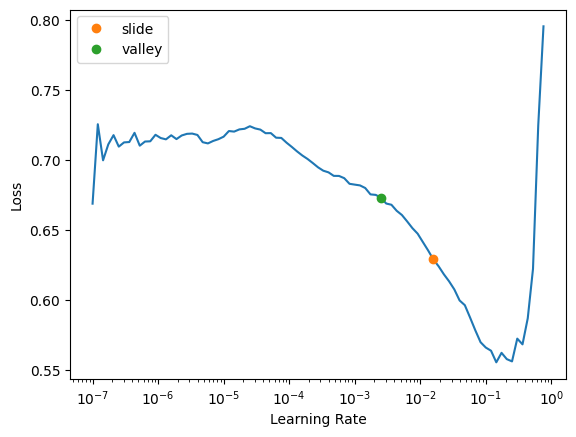

In [23]:
#learn.lr_find()
learn.lr_find(suggest_funcs=(slide,valley))

In [24]:
%%time
learn.fit_one_cycle(2, 1.089e-3)

epoch,train_loss,valid_loss,roc_auc_score,time
0,0.169117,0.167791,0.957715,01:26
1,0.156397,0.162307,0.959764,01:27


CPU times: user 2min 52s, sys: 1.35 s, total: 2min 53s
Wall time: 2min 54s


In [25]:
dl = test_dl

In [26]:
learn.save('nn_pnality_tp_pd')

Path('models/nn_pnality_tp_pd.pth')

In [27]:
nn_preds = learn.get_preds(dl=dl)
nn_preds_x = learn.get_preds()[0]
a_preds, _ = learn.get_preds(dl=dl)
nn_preds_y = a_preds.squeeze(1)
nn_preds_proba = (a_preds[:, 1])

In [28]:
a_preds.shape

torch.Size([250000, 2])

In [29]:
nn_preds_y.shape,sub_df.shape

(torch.Size([250000, 2]), (250000, 2))

In [30]:
nn_preds_x

tensor([[8.8069e-01, 1.1931e-01],
        [9.9999e-01, 6.0814e-06],
        [7.5790e-01, 2.4210e-01],
        ...,
        [6.1600e-01, 3.8400e-01],
        [9.9957e-01, 4.2760e-04],
        [9.9977e-01, 2.2768e-04]])

In [31]:
nn_preds_y

tensor([[9.9491e-01, 5.0900e-03],
        [7.3577e-01, 2.6423e-01],
        [9.9994e-01, 5.8186e-05],
        ...,
        [1.3268e-01, 8.6732e-01],
        [9.9868e-01, 1.3232e-03],
        [8.1692e-01, 1.8308e-01]])

In [32]:
a_preds

tensor([[9.9491e-01, 5.0900e-03],
        [7.3577e-01, 2.6423e-01],
        [9.9994e-01, 5.8186e-05],
        ...,
        [1.3268e-01, 8.6732e-01],
        [9.9868e-01, 1.3232e-03],
        [8.1692e-01, 1.8308e-01]])

In [33]:
nn_preds_proba

tensor([5.0900e-03, 2.6423e-01, 5.8186e-05,  ..., 8.6732e-01, 1.3232e-03,
        1.8308e-01])

In [34]:
#final_preds = torch.round(a_preds).long()
final_preds = a_preds[:,1]
final_preds

tensor([5.0900e-03, 2.6423e-01, 5.8186e-05,  ..., 8.6732e-01, 1.3232e-03,
        1.8308e-01])

In [35]:
final_preds.shape

torch.Size([250000])

In [36]:
!rm submission.csv
sub_df['y'] = final_preds
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

rm: cannot remove 'submission.csv': No such file or directory


,y
id,
750000,0.005090
750001,0.264231
750002,0.000058
750003,0.000048
750004,0.035166
...,...
999995,0.000065
999996,0.118102
999997,0.867318


## Decision Trees

### Random Forests

In [37]:
%%time
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf_model = rf.fit(X_train, y_train);

rf_preds = tensor(rf_model.predict(test_dl.xs))
rf_preds_probs = tensor(rf_model.predict_proba(test_dl.xs))[:, 1]

rf_preds_x = tensor(rf_model.predict(X_test))
rf_preds_proba = tensor(rf_model.predict_proba(X_test))[:, 1]

#mse = mean_absolute_error(y_test, rf_preds_x)
#rmse = np.sqrt(mse)

#accuracy_score(y_test,rf_preds_x)
rf_score = roc_auc_score(y_test,rf_preds_proba)
rf_score

CPU times: user 1min 53s, sys: 272 ms, total: 1min 53s
Wall time: 1min 53s


0.9636044171683071

In [38]:
rf_preds_probs,rf_preds_probs.shape

(tensor([4.2483e-03, 1.6807e-01, 6.5000e-03,  ..., 7.1372e-01, 8.1934e-05,
         7.0603e-02]),
 torch.Size([250000]))

In [39]:
rf_preds_probs 

tensor([4.2483e-03, 1.6807e-01, 6.5000e-03,  ..., 7.1372e-01, 8.1934e-05,
        7.0603e-02])

In [40]:
def rf_feat_importance(m, train_subset):
    return pd.DataFrame({'cols':train_subset.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [41]:
fi = rf_feat_importance(rf_model, X_train)
#fi[:10]

fi

,cols,imp
12,duration,0.462010
10,balance,0.097430
7,month,0.071602
9,age,0.068323
11,day,0.056888
8,poutcome,0.046993
4,housing,0.035371
14,pdays,0.034262
6,contact,0.028617
0,job,0.026093


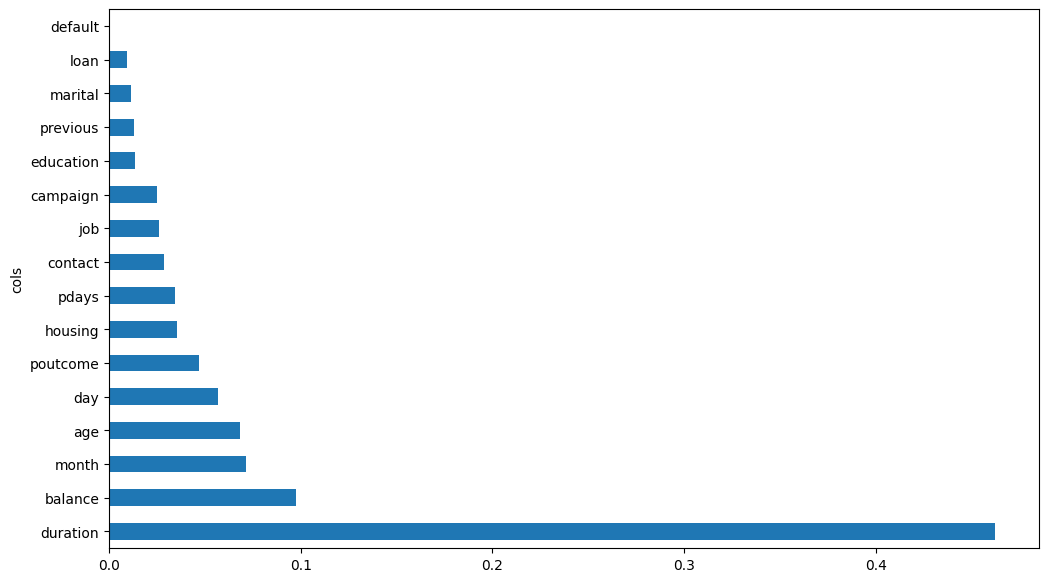

In [42]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

#plot_fi(fi[:30]);
plot_fi(fi);

#### Cross validation - RF

In [43]:
rf = RandomForestClassifier(100, min_samples_leaf=3)
rf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
rf_oof_predictions, rf_test_predictions, rf_mean_score, rf_fold_scores = cross_val_predict(
    model=rf, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.964718
Training fold 2/5...
Fold 2 roc_auc: 0.963440
Training fold 3/5...
Fold 3 roc_auc: 0.962527
Training fold 4/5...
Fold 4 roc_auc: 0.963119
Training fold 5/5...
Fold 5 roc_auc: 0.963801

Mean roc_auc: 0.963521


In [45]:
rf_oof_predictions.shape, rf_test_predictions.shape

((600000,), (150000,))

In [46]:
rf_oof_predictions

array([3.05927342e-05, 8.45604162e-01, 2.34090909e-03, ..., 0.00000000e+00, 3.09982832e-05, 0.00000000e+00])

In [47]:
rf_test_predictions

array([8.17404842e-02, 5.05351682e-04, 1.58056864e-01, ..., 4.14761802e-01, 1.69558286e-03, 8.85729770e-06])

In [48]:
rf_mean_score, rf_fold_scores

(0.963521051330849,
 [0.9647177467566862,
  0.9634398152400162,
  0.9625273177183717,
  0.9631189541909445,
  0.9638014227482258])

In [49]:
!rm submission.csv
sub_df['y'] = rf_preds_probs
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.004248
750001,0.168068
750002,0.006500
750003,0.000200
750004,0.027447
...,...
999995,0.000000
999996,0.195302
999997,0.713722


## Gradient Boosting

### XGBoost

In [50]:
%%time
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)

xgb_preds = tensor(xgb_model.predict(test_dl.xs))
xgb_preds_proba = tensor(xgb_model.predict_proba(test_dl.xs))[:, 1]

xgb_preds_x = tensor(xgb_model.predict(X_test))
xgb_preds_x_proba = tensor(xgb_model.predict_proba(X_test))[:, 1]

xgb_score = roc_auc_score(y_test,xgb_preds_x_proba)
xgb_score

CPU times: user 7.66 s, sys: 52.1 ms, total: 7.72 s
Wall time: 3.96 s


0.9655435894216133

In [51]:
xgb_preds_proba

tensor([1.7990e-03, 8.6318e-02, 4.3631e-04,  ..., 8.4090e-01, 6.5369e-04,
        1.5318e-01])

#### XGB Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

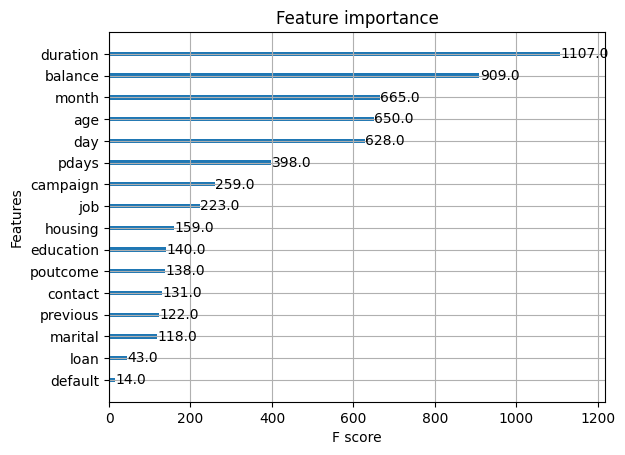

In [52]:
#plot_importance(xgb_model.fit(X_train, y_train))
plot_importance(xgb_model)

#### Cross Validation - XGBoost

In [53]:
xgb_model = xgb.XGBClassifier()
xgb_model

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [54]:
xgb_oof_predictions, xgb_test_predictions, xgb_mean_score, xgb_fold_scores = cross_val_predict(
    model=xgb_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Fold 1 roc_auc: 0.966990
Training fold 2/5...
Fold 2 roc_auc: 0.966369
Training fold 3/5...
Fold 3 roc_auc: 0.964977
Training fold 4/5...
Fold 4 roc_auc: 0.965664
Training fold 5/5...
Fold 5 roc_auc: 0.966273

Mean roc_auc: 0.966054


In [55]:
xgb_oof_predictions

array([6.28353911e-04, 9.06540513e-01, 3.75940488e-03, ..., 2.96932529e-03, 3.95548996e-04, 1.02362351e-03])

In [56]:
xgb_test_predictions

array([9.61350128e-02, 7.39557014e-04, 1.04421172e-01, ..., 4.47439551e-01, 3.63996427e-04, 1.76069099e-04])

In [57]:
xgb_mean_score

0.966054353665357

In [58]:
 xgb_fold_scores

[0.9669898367688495,
 0.9663685714648527,
 0.9649768656185789,
 0.9656639080661872,
 0.9662725864083174]

In [59]:
!rm submission.csv
sub_df['y'] = xgb_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.001799
750001,0.086318
750002,0.000436
750003,0.000048
750004,0.012014
...,...
999995,0.000178
999996,0.133658
999997,0.840900


### LGBM

In [60]:
%%time
#ds subset
lgbm_model = lgb.LGBMClassifier()
lgbm_model = lgbm_model.fit(X_train, y_train)

#test set preds
lgbm_preds = tensor(lgbm_model.predict(test_dl.xs))
lgbm_preds_prob = tensor(lgbm_model.predict_proba(test_dl.xs))
lgbm_preds_proba = (lgbm_preds_prob[:, 1])

#validation set preds
lgbm_preds_x = tensor(lgbm_model.predict(X_test))
lgbm_preds_x_prob = tensor(lgbm_model.predict_proba(X_test))
lgbm_positive_preds_x = (lgbm_preds_x_prob[:, 1])

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

#lgb_preds_x_prob = tensor(lgb_model.predict_proba(X_test))

lgbm_score = roc_auc_score(y_test,lgbm_positive_preds_x)
lgbm_score

[LightGBM] [Info] Number of positive: 72134, number of negative: 527866
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120223 -> initscore=-1.990317
[LightGBM] [Info] Start training from score -1.990317
CPU times: user 12.6 s, sys: 126 ms, total: 12.7 s
Wall time: 6.56 s


0.9643699667957698

In [61]:
lgbm_preds_prob,lgbm_preds_prob.shape

(tensor([[9.9560e-01, 4.3972e-03],
         [8.7238e-01, 1.2762e-01],
         [9.9897e-01, 1.0331e-03],
         ...,
         [2.7020e-01, 7.2980e-01],
         [9.9907e-01, 9.2736e-04],
         [8.6343e-01, 1.3657e-01]]),
 torch.Size([250000, 2]))

#### LGBM Feature Importance

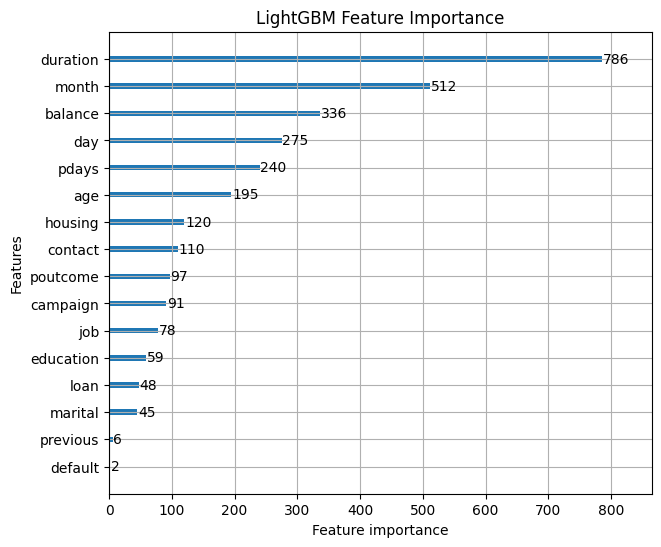

In [62]:
# Plot feature importance without using Gain or split
lgb.plot_importance(lgbm_model, figsize=(7,6), title="LightGBM Feature Importance")
#plt.title('LGBM Feature Importance')
#plt.tight_layout()
plt.show()

#### Cross Validation - LGBM

In [63]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [64]:
lgbm_oof_predictions, lgbm_test_predictions, lgbm_mean_score, lgbm_fold_scores = cross_val_predict(
    model=lgbm_model, X_train=X_train, y_train=y_train, X_test=X_test,
)

Training fold 1/5...
[LightGBM] [Info] Number of positive: 57708, number of negative: 422292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 480000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120225 -> initscore=-1.990301
[LightGBM] [Info] Start training from score -1.990301
Fold 1 roc_auc: 0.966049
Training fold 2/5...
[LightGBM] [Info] Number of positive: 57707, number of negative: 422293
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1007
[LightGBM] [Info] Number of data points i

In [65]:
lgbm_oof_predictions

array([2.59980495e-04, 8.57206827e-01, 2.34299534e-03, ..., 2.39323527e-03, 6.22647900e-04, 1.66831515e-03])

In [66]:
lgbm_test_predictions

array([0.09702881, 0.00095218, 0.14990246, ..., 0.36082073, 0.00102284, 0.00054358])

In [67]:
 lgbm_mean_score

0.9648587935240256

In [68]:
lgbm_fold_scores

[0.9660491013127102,
 0.9650386858514581,
 0.9640362271652974,
 0.9642866959995607,
 0.9648832572911017]

In [69]:
!rm submission.csv
sub_df['y'] = lgbm_preds_proba
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.004397
750001,0.127624
750002,0.001033
750003,0.000414
750004,0.026511
...,...
999995,0.000319
999996,0.112809
999997,0.729801


### CatBoost

In [70]:
%%time
#using full ds
cat_model = CatBoostClassifier()
cat_model = cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

#test set preds
cat_preds = tensor(cat_model.predict(test_dl.xs))
cat_preds_probs = tensor(cat_model.predict_proba(test_dl.xs))[:, 1]
#cat_preds_final = cat_preds.squeeze(1)

#validation set preds
cat_preds_x = tensor(cat_model.predict(X_test))
cat_preds_x_proba = tensor(cat_model.predict_proba(X_test))[:, 1]

#cat_preds_x_final = cat_preds_x.squeeze(1)

#accuracy_score(y_test,cat_preds_x)

cat_score = roc_auc_score(y_test,cat_preds_x_proba)
cat_score

CPU times: user 3min 53s, sys: 10.2 s, total: 4min 3s
Wall time: 1min 2s


0.9668925574740365

#### CatBoost Feature Importance

In [71]:
feature_importance_default = cat_model.get_feature_importance()
feature_names = X_train.columns

# Create DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_default
}).sort_values('importance', ascending=False)

print("=== Default Feature Importance (PredictionValuesChange) ===")
print(importance_df.head(10))

=== Default Feature Importance (PredictionValuesChange) ===
     feature  importance
12  duration   45.979105
6    contact   10.337649
7      month    9.368255
10   balance    8.565899
4    housing    5.313058
11       day    4.458422
9        age    2.592322
13  campaign    2.521878
14     pdays    2.481563
8   poutcome    2.353160


#### Cross validation - CatBoost

In [72]:
cat_model = CatBoostClassifier()
cat_model

In [73]:
cat_oof_predictions, cat_test_predictions, cat_mean_score, cat_fold_scores = cross_val_predict(
    model=cat_model, X_train=X_train, y_train=y_train, X_test=X_test, 
)

Training fold 1/5...
Learning rate set to 0.143822
0:	learn: 0.4860555	total: 49.6ms	remaining: 49.6s
1:	learn: 0.3663844	total: 98.7ms	remaining: 49.3s
2:	learn: 0.3011205	total: 149ms	remaining: 49.5s
3:	learn: 0.2635635	total: 198ms	remaining: 49.4s
4:	learn: 0.2409040	total: 254ms	remaining: 50.5s
5:	learn: 0.2268514	total: 300ms	remaining: 49.7s
6:	learn: 0.2159174	total: 347ms	remaining: 49.2s
7:	learn: 0.2087862	total: 391ms	remaining: 48.5s
8:	learn: 0.2039638	total: 439ms	remaining: 48.4s
9:	learn: 0.1996276	total: 486ms	remaining: 48.1s
10:	learn: 0.1962966	total: 534ms	remaining: 48s
11:	learn: 0.1934788	total: 582ms	remaining: 47.9s
12:	learn: 0.1912167	total: 627ms	remaining: 47.6s
13:	learn: 0.1895312	total: 674ms	remaining: 47.4s
14:	learn: 0.1875997	total: 722ms	remaining: 47.4s
15:	learn: 0.1865491	total: 768ms	remaining: 47.2s
16:	learn: 0.1847773	total: 817ms	remaining: 47.2s
17:	learn: 0.1838548	total: 862ms	remaining: 47s
18:	learn: 0.1830493	total: 910ms	remaining

## Ensembling

### Averaging

#### CatBoost + XGBoost

In [74]:
cat_xgb_preds = (xgb_preds_proba + cat_preds_probs)/ 2
cat_xgb_preds 

tensor([2.4487e-03, 9.2225e-02, 3.2634e-04,  ..., 7.4984e-01, 8.0441e-04,
        1.4962e-01])

In [75]:
cat_xgb_x_preds = (xgb_preds_x_proba + cat_preds_x_proba)/ 2
cat_xgb_x_preds 

tensor([1.0586e-01, 3.9252e-04, 7.4701e-02,  ..., 4.3054e-01, 2.2184e-04,
        1.6934e-04])

In [76]:
cat_xgb_score = roc_auc_score(y_test,cat_xgb_x_preds)
cat_xgb_score

0.9669230330409958

#### CatBoost + LGBM

In [77]:
cat_lgbm_preds = (lgbm_preds_proba + cat_preds_probs)/ 2
cat_lgbm_preds 

tensor([3.7478e-03, 1.1288e-01, 6.2471e-04,  ..., 6.9429e-01, 9.4125e-04,
        1.4131e-01])

In [78]:
cat_lgbm_x_preds = (lgbm_positive_preds_x + cat_preds_x_proba)/ 2
cat_lgbm_x_preds.shape

torch.Size([150000])

In [79]:
cat_lgbm_score = roc_auc_score(y_test,cat_lgbm_x_preds)
cat_lgbm_score

0.966625616281595

#### XGBoost + LGBM

In [80]:
lgbm_xgb_preds = (lgbm_preds_proba +  xgb_preds_proba)/ 2
lgbm_xgb_preds 

tensor([3.0981e-03, 1.0697e-01, 7.3469e-04,  ..., 7.8535e-01, 7.9053e-04,
        1.4488e-01])

In [81]:
lgbm_xgb_preds_x = (lgbm_positive_preds_x + xgb_preds_x_proba)/ 2
lgbm_xgb_score = roc_auc_score(y_test,lgbm_xgb_preds_x)
lgbm_xgb_score

0.9658510201255271

In [82]:
!rm submission.csv
sub_df['y'] = lgbm_xgb_preds 
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.003098
750001,0.106971
750002,0.000735
750003,0.000231
750004,0.019262
...,...
999995,0.000249
999996,0.123234
999997,0.785350


#### CatBoost + LGBM + XGBoost

In [83]:
cat_lgbm_xgb_preds = (lgbm_preds_proba + cat_preds_probs + xgb_preds_proba)/ 3
cat_lgbm_xgb_preds 

tensor([3.0982e-03, 1.0402e-01, 5.6191e-04,  ..., 7.4316e-01, 8.4539e-04,
        1.4527e-01])

In [84]:
cat_lgbm_xgb_preds_x = (lgbm_positive_preds_x + cat_preds_x_proba + xgb_preds_x_proba)/ 3
cat_lgbm_xgb_score = roc_auc_score(y_test,cat_lgbm_xgb_preds_x)
cat_lgbm_xgb_score

0.9667546499049426

## AutoML

### AutoGluon

In [85]:
target = 'y'
eval_metric = 'roc_auc'
#train_data = train
train_data = train_df
#Time_limit = 3600*8
Time_limit = 300
problem_type='binary'

In [86]:
%%time
predictor = TabularPredictor(label=target, eval_metric=eval_metric, verbosity=1).fit(
    train_data, presets='best_quality', time_limit=Time_limit,
    ag_args_fit={'num_gpus': 1}
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
)

results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20250808_042456"
2025-08-08 04:24:56,883	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.8.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-08-08 04:24:59,153	INFO worker.py:1843 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning generated.
(_ray_fit pid=728) 1 warning genera

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L1   0.962502     roc_auc      15.975622  153.108854               15.975622         153.108854            1       True          1
1  WeightedEnsemble_L3   0.962502     roc_auc      16.101907  160.657346                0.126285           7.548492            3       True          4
2  WeightedEnsemble_L2   0.962502     roc_auc      16.111573  153.267890                0.135951           0.159037            2       True          2
3    LightGBMXT_BAG_L2   0.961759     roc_auc      20.055044  226.460869                4.079422          73.352016            2       True          3
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_LGB'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  

In [87]:
%%time
#predictor = TabularPredictor(label=target, eval_metric=eval_metric,verbosity=1,problem_type=problem_type).fit(
    #train_data, presets='best_quality',excluded_model_types=['KNN'], time_limit=Time_limit,
    #ag_args_fit={
        #'num_gpus': 2, 
        #'stopping_metric': 'log_loss'
    #}
#)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [88]:
%%time
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    LightGBMXT_BAG_L1   0.962502     roc_auc      15.975622  153.108854               15.975622         153.108854            1       True          1
1  WeightedEnsemble_L3   0.962502     roc_auc      16.101907  160.657346                0.126285           7.548492            3       True          4
2  WeightedEnsemble_L2   0.962502     roc_auc      16.111573  153.267890                0.135951           0.159037            2       True          2
3    LightGBMXT_BAG_L2   0.961759     roc_auc      20.055044  226.460869                4.079422          73.352016            2       True          3
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_LGB'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  

In [89]:
%%time
predictor.leaderboard()

CPU times: user 4.99 ms, sys: 0 ns, total: 4.99 ms
Wall time: 4.63 ms


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,0.962502,roc_auc,15.975622,153.108854,15.975622,153.108854,1,True,1
1,WeightedEnsemble_L3,0.962502,roc_auc,16.101907,160.657346,0.126285,7.548492,3,True,4
2,WeightedEnsemble_L2,0.962502,roc_auc,16.111573,153.267890,0.135951,0.159037,2,True,2
3,LightGBMXT_BAG_L2,0.961759,roc_auc,20.055044,226.460869,4.079422,73.352016,2,True,3


In [90]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df)
autogluon_preds_proba.head(5)  

CPU times: user 43.1 s, sys: 27.1 ms, total: 43.1 s
Wall time: 21.7 s


,0,1
id,,
750000,0.991903,0.008097
750001,0.824635,0.175365
750002,0.999153,0.000847
750003,0.999578,0.000422
750004,0.980366,0.019634


In [91]:
predictions = autogluon_preds_proba

In [92]:
%%time
#autogluon_preds = predictor.predict(test_df)
autogluon_preds_proba = predictor.predict_proba(test_df, as_multiclass=False)
autogluon_preds_proba.head(5)  

CPU times: user 43.8 s, sys: 23.5 ms, total: 43.8 s
Wall time: 22.2 s


id
750000    0.008097
750001    0.175365
750002    0.000847
750003    0.000422
750004    0.019634
Name: y, dtype: float32

In [93]:
autogluon_preds_proba.shape, cat_lgbm_xgb_preds.shape

((250000,), torch.Size([250000]))

In [94]:
autogluon_preds_proba.values

array([0.0080973 , 0.17536464, 0.00084744, ..., 0.82664716, 0.00190702, 0.12209941], dtype=float32)

In [95]:
!rm submission.csv
sub_df['y'] = autogluon_preds_proba.values
sub_df.to_csv('submission.csv', index=False)
sub = pd.read_csv('submission.csv', index_col='id')
sub

,y
id,
750000,0.008097
750001,0.175365
750002,0.000847
750003,0.000422
750004,0.019634
...,...
999995,0.000536
999996,0.086394
999997,0.826647


In [96]:
#!rm submission.csv
#submission = pd.read_csv(path/'sample_submission.csv')
#submission['y'] = autogluon_preds_proba
#submission.head()
#submission.to_csv(path/'sample_submission.csv', index=False)

In [97]:
#!rm submission.csv
#submit = pd.read_csv(path/'sample_submission.csv')
#predictions = predictions.reset_index(drop=False)
#submit = pd.DataFrame({'id': predictions['id'], 'Personality': predictions['Personality']})
#submit.set_index('id', inplace=True)
#submit.to_csv('submission.csv', index=True)
#sub = pd.read_csv('submission.csv', index_col='id')
#sub

### Ranking

In [98]:
auc_roc_score = pd.DataFrame({
    'algorithm': ['Random Forest','XGBoost','LGBM','CatBoost',
                  'CatBoost_XGB_average','CatBoost_LGBM_average',
                  'XGB_LGBM_average','CatBoost_XGB_LGBM_average',
                  
                 ],
    'auc_roc_score': [rf_score,xgb_score,lgbm_score,cat_score,
                      cat_xgb_score,cat_lgbm_score,lgbm_xgb_score,
                      cat_lgbm_xgb_score,
                 
           ]
})

auc_roc_sorted = auc_roc_score.sort_values(by='auc_roc_score', ascending=False)
auc_roc_sorted

,algorithm,auc_roc_score
4,CatBoost_XGB_average,0.966923
3,CatBoost,0.966893
7,CatBoost_XGB_LGBM_average,0.966755
5,CatBoost_LGBM_average,0.966626
6,XGB_LGBM_average,0.965851
1,XGBoost,0.965544
2,LGBM,0.964370
0,Random Forest,0.963604
